In [1]:
import os, sys

sys.path.append(os.path.abspath("Datasets"))
sys.path.append(os.path.abspath("Images"))

### K-Nearest Neighbor
<img src="Images/5_1_KNN.JPG" height="600">
- Step 1: Choose the number K of neighbors
- Step 2: Using Eucledian distance (or other distance), take K nearest neighbors of the new data point
- Step 3: Among these K neighbors, count the number of data points in each category
- Step 4: Decide the new point to that category with the most neighbor.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
dataset = pd.read_csv("Datasets/ML_a_z/Social_Network_Ads.csv")

In [5]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [6]:
X = dataset.iloc[:, 2:-1].values
Y = dataset.iloc[:, -1].values

In [7]:
# Split into training and test set
from sklearn.cross_validation import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,
                                                   random_state=0)

In [9]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [10]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
classifier = KNeighborsClassifier(n_neighbors=10)

In [13]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
# Confusion matrix:
from sklearn.metrics import confusion_matrix

In [19]:
cm = confusion_matrix(y_test, y_pred)

In [20]:
cm

array([[64,  4],
       [ 3, 29]])

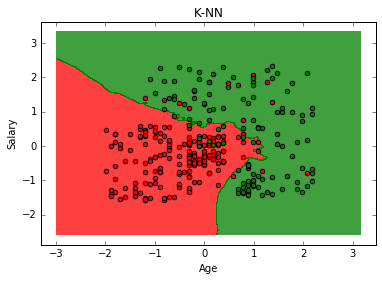

In [25]:
# Visualization:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1 = X_set[:, 0]
X2 = X_set[:, 1]

X1, X2 = np.meshgrid(np.arange(X1.min()-1, X1.max()+1, 0.01),
                    np.arange(X2.min()-1, X2.max()+1, 0.01))
X_plot = np.array([X1.ravel(), X2.ravel()]).T
y_plot = classifier.predict(X_plot).reshape(X1.shape)
plt.contourf(X1, X2, y_plot, alpha=0.75, 
             cmap=ListedColormap(('red', 'green')))

for i, j in enumerate(np.unique(y_set)): #j can be 0 or 1
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c=ListedColormap(('red', 'green'))(i), 
               label=j)
plt.title("K-NN (Training set)")
plt.xlabel("Age")
plt.ylabel("Salary")


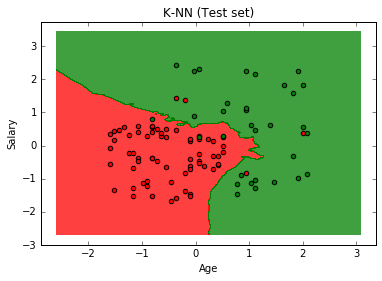

In [26]:
# Visualization:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1 = X_set[:, 0]
X2 = X_set[:, 1]

X1, X2 = np.meshgrid(np.arange(X1.min()-1, X1.max()+1, 0.01),
                    np.arange(X2.min()-1, X2.max()+1, 0.01))
X_plot = np.array([X1.ravel(), X2.ravel()]).T
y_plot = classifier.predict(X_plot).reshape(X1.shape)
plt.contourf(X1, X2, y_plot, alpha=0.75, 
             cmap=ListedColormap(('red', 'green')))

for i, j in enumerate(np.unique(y_set)): #j can be 0 or 1
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c=ListedColormap(('red', 'green'))(i), 
               label=j)
plt.title("K-NN (Test set)")
plt.xlabel("Age")
plt.ylabel("Salary")